In [6]:
pip install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2 -> 23.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
"""Converts the input csv file into a DataFrame and adds an EOF marker"""
data = pd.read_csv('136_PEAR.bedgraph', sep= '\t', names = ['Chrom','Beginning', 'End', 'Coverage'])

data.loc[data.shape[0]] = ['END','END','END','END']

In [8]:
"""Creates a .txt file of the previous DataFrame"""
path = r'DATAFile.txt'
with open (path, 'a') as f:
    fileString = data.to_string()
    f.write(fileString)

In [9]:
"""___BED_2_Promoter___

    Takes in a .bedgraph file
    searches for continues coordinates
    of coverage data and creates a 
    DataFrame of promoters
    
    Output: 
    - a DataFrame and matching .txt file sorted by 
    - Promoter Number, Chrom, Start, Stop, Length, Avg, Med, Max Coverage

"""

i = 0
# counter for each row of the converted BED file
k = 0
# keeps track of last row number at the end of each promoter
j = 1
# counts the number of promoters

lineList = []

row = data.shape[0]

promoters = pd.DataFrame(columns=
        ['Promoter Number','Chrom',
         'Start', 'Stop', 'Length', 
         'Avg', 'Med', 'Max Coverage'])

while i < row - 1:

    end = data.iat[i,2]
    start = data.iat[i+1,1]
    cov = 0

    if end == start:
        while end == start:

            end = data.iat[i,2]
            start = data.iat[i+1,1]
            i += 1
            newFrame = data.iloc[k:i]
            cov = newFrame.loc[i-1, 'Coverage']


        chrom = newFrame.loc[i-1, 'Chrom']
        promStart = newFrame.loc[k, 'Beginning']
        promEnd = newFrame.loc[i-1, 'End']
        promLen = promEnd - promStart
        mean = newFrame['Coverage'].mean()
        median = newFrame['Coverage'].median()
        maximum = newFrame['Coverage'].max()

        promoters.loc[j, 'Promoter Number'] = j
        promoters.loc[j, 'Chrom'] = chrom
        promoters.loc[j, 'Start'] = promStart
        promoters.loc[j, 'Stop'] = promEnd
        promoters.loc[j, 'Length'] = promLen
        promoters.loc[j, 'Avg'] = mean
        promoters.loc[j, 'Med'] = median
        promoters.loc[j, 'Max Coverage'] = maximum

        k = i
        j += 1
        cov = 0
    
    else:
        """list of oneliners"""
        lineList.append(data.iat[i,2])
        i += 2 

[217451, 1460, 808556, 809099, 73946, 77900, 78434, 115166, 137780, 142564, 143151, 178996, 199334, 214286, 264428, 307843, 1526062, 1526854, 1529087, 1531826, 1531868, 1660, 3374, 3394, 226632, 336728, 339371, 345721, 353397, 380571, 383062, 422817, 1444, 575894, 1730, 213337, 225917, 233542, 234285, 242038, 269045, 1067, 5351, 7167, 27939, 31936, 41523, 53794, 66928, 80602, 115550, 116105, 129929, 167574, 207073, 313282, 330605, 358656, 397604, 466185, 472292, 557061, 589849, 595824, 596344, 668244, 787323, 810250, 846657, 851667, 851692, 878161, 909244, 910136, 920622, 938970, 963323, 974256, 988069, 1012522, 1052851, 1070347, 1079804, 2426, 2952, 67758, 78971, 95031, 97753, 98774, 262824, 267357, 302248, 316597, 354836, 356063, 361631, 362133, 365282, 365819, 380606, 429696, 472798, 509360, 538053, 559071, 562184, 1643, 19029, 1657, 5981, 7300, 11201, 13673, 1066483, 1071350, 1071392, 1078035, 2569, 232, 1548, 781674, 10150, 14346, 111850, 117439, 128449, 155259, 162389, 187076, 20

In [ ]:
"""Creates a .txt file of the promoters found"""
path = r'Promoters.txt'
with open (path, 'a') as f:
    fileString = promoters.to_string()
    f.write(fileString)  

In [10]:
"""Creates a DataFrame and matching .txt file of promoters with lengths over 1000"""
longFile = promoters.loc[(promoters['Length'] > 1000)]

path = r'LongProm.txt'
with open (path, 'a') as f:
    fileString = longFile.to_string()
    f.write(fileString) 

<AxesSubplot:>

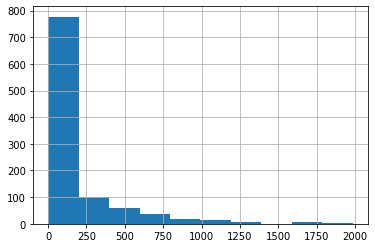

In [11]:
"""Creates a Histogram of the promoter lengths"""
promoters = promoters.loc[(promoters['Length'] >= 0) 
                    & (promoters['Length'] < 1000)]
   
promoters['Length'].hist()

In [ ]:
"""Creates a Histogram of the Average Coverage"""
covCopy = promoters.loc[(promoters['Avg'] >= 0) 
                     & (promoters['Avg'] < 2000)]

covCopy['Avg'].hist()

In [9]:
"""Creates a DataFrame from the GFF file"""
geneFF = pd.read_csv('USEgenomicGCF.gff', sep= '\t', 
        names = ['Chrom','2','TYPE',
                 'START','STOP','6',
                 'STRAND','8','GENE ID'])

genes = geneFF[['Chrom','TYPE',
                 'START','STOP',
                 'STRAND','GENE ID']]

genes = genes.drop([0,3])
genes = genes.loc[(genes['TYPE'] == "gene")]


In [10]:
"""Converts the GFF chromosome IDs into matching ones from the BED files"""
CHRMconv = pd.read_csv('chrmID.txt',sep = '\t', 
            names = ['Chrom', 'Ref SEQ ID'])

i = 0
while i < CHRMconv.shape[0]: 
    genes.loc[genes.Chrom == CHRMconv.iat[i,1], 
                ['Chrom']] = CHRMconv.iat[i,0]
    i += 1

In [11]:
"""Creates a .txt file of the GFF data"""
path = r'GENES.txt'
with open (path, 'a') as f:
    fileString = genes.to_string()
    f.write(fileString)

In [12]:
"""___Promoter_2_GENE___"""

"""Creates a new DataFrame of
   promoter-gene pairings"""

prom2gene = pd.DataFrame(columns=
        ['Promoter Number','Chrom',
         'PROM Start','PROM Stop',
         'Strand','GENE Start',
         'GENE Stop','GENE ID'])

PROMrow = promoters.shape[0]
GENErow = genes.shape[0]

i = 0
# counter for the gene DataFrame 
j = 0
# counter for the promoter DataFrame
k = 0 
# counter for the gene-promoter pairs

while i < GENErow - 1:
    GENEstrand = genes.iat[i,4]
    
    """determines which strand the gene
       is located on and adjusts the 
       parameters to search from the 
       other direction
       """
    if GENEstrand == "+":

        GENEstart = genes.iat[i,2]
        GENEstop = genes.iat[i,3]
        PROMstart = promoters.iat[j,2]
        PROMstop = promoters.iat[j,3]
        GENEchrom = genes.iat[i, 0] 
        PROMchrom = promoters.iat[j,1]
        
    if GENEstrand == "-":

        GENEstart = genes.iat[i,3]
        GENEstop = genes.iat[i,2]
        PROMstart = promoters.iat[j,3]
        PROMstop = promoters.iat[j,2]
        GENEchrom = genes.iat[i, 0] 
        PROMchrom = promoters.iat[j,1] 

    if PROMstop >= GENEstart - 100 and PROMstop <= GENEstart +100 
        and PROMchrom == GENEchrom:
        
        prom2gene.loc[k, 'Promoter Number'] = promoters.iat[j,0]
        prom2gene.loc[k, 'Chrom'] = promoters.iat[j,1]
        prom2gene.loc[k, 'PROM Start'] = PROMstart
        prom2gene.loc[k, 'PROM Stop'] = PROMstop
        prom2gene.loc[k, 'Strand'] = genes.iat[i,4]
        prom2gene.loc[k, 'GENE Start'] = GENEstart
        prom2gene.loc[k, 'GENE Stop'] = GENEstop
        prom2gene.loc[k, 'GENE ID'] = genes.iat[i,5]
        
        k += 1
        j += 1 
        i += 1

    elif j < PROMrow - 1: 
        j += 1
    
    else: 
        j = 0 
        i += 1   

In [13]:
"""Creates a .txt file of the Promoter-Gene pairings"""
path = r'PROM_2_GENE.txt'
with open (path, 'a') as f:
    fileString = prom2gene.to_string()
    f.write(fileString)